In [1]:
import time
import json
import datetime
import pandas as pd
import numpy as np

In [2]:
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


In [3]:
def retrieve_data(data_path = "../data/", start_idx=1, stop_idx=60):
    # list to store files
    f_store = []
    results = {}
    
    # Iterate directory
    for file_name in os.listdir(data_path):
        # check if current file_path is a file
        if os.path.isfile(os.path.join(data_path, file_name)):
            # add filename to list
            f_store.append(file_name)

    flag = True
    for file_name in f_store:
        data = {}
        tmp_dt = ''
        # Open the JSON file
        with open(data_path + file_name) as file:
            data = json.load(file)
        for i in range(start_idx, stop_idx+1):
            if data:
                if i == start_idx:
                    tmp_dt = data[str(i)]['timestamp']
                if flag:
                    if i == start_idx:
                        results['timestamp'] = [tmp_dt]
                    results[data[str(i)]['name']] = [data[str(i)]['value']]
                else:
                    if i == start_idx:
                        results['timestamp'].append(tmp_dt)
                    results[data[str(i)]['name']].append(data[str(i)]['value'])
        flag = False
    #print(results)
    return results

In [4]:
res = retrieve_data()

In [5]:
df = pd.DataFrame.from_dict(res)
df.head()

,timestamp,GECO/MPRX_DI_DOS2_Flowrate_50Hz_mlmin_I,GECO/MPRX_DI_DOS3_Flowrate_50Hz_mlmin_I,GECO/MPRX_DI_FOG_Flowrate_50Hz_lmin_I,GECO/MPRX_DI_FOG_Foam_Air_Factor_I,GECO/MPRX_DI_FOG_Foam_Density_gl_I,GECO/MPRX_DI_FOG_Foam_Loss_Factor_pct_I,GECO/MPRX_DI_FOG_Foamingagent_pct_R,GECO/MPRX_DI_FOG_RESERVED_Foamingagent_cpct_I,GECO/MPRX_DI_MIX_Speed_Hz_I,...,GECO/MP_DOS3_Flowrate_current_mlmin_I,GECO/MP_Error_Any_Active,GECO/MP_Master_On,GECO/MP_Mixer_Run,GECO/MP_Pressure_reached,GECO/MP_Pump_Pressure_Current_bar_R,GECO/MP_Pump_Run,GECO/MP_Water_Run,GECO/MP_Waterflowrate_current_Lh_R,GECO/MP_Waterprobe_Upper_Cov
0,"21.06.2024 15:28:38,511643",0,0,170,100,50,0,3.0,0,0,...,0,True,True,False,False,0.011469,False,False,0.0,True
1,"21.06.2024 15:29:12,369486",0,0,170,100,50,0,3.0,0,0,...,0,True,True,False,False,0.015040,False,False,0.0,True
2,"21.06.2024 15:29:46,129094",0,0,170,100,50,0,3.0,0,0,...,0,True,True,False,False,0.013600,False,False,0.0,True
3,"21.06.2024 15:30:20,078737",0,0,170,100,50,0,3.0,0,0,...,0,True,True,False,False,0.014294,False,False,0.0,True
4,"21.06.2024 15:30:53,879135",0,0,170,100,50,0,3.0,0,0,...,0,True,True,False,False,0.012154,False,False,0.0,True


In [6]:
df['timestamp']= pd.to_datetime(df['timestamp'],  format='%d.%m.%Y %H:%M:%S,%f')
df.head()

,timestamp,GECO/MPRX_DI_DOS2_Flowrate_50Hz_mlmin_I,GECO/MPRX_DI_DOS3_Flowrate_50Hz_mlmin_I,GECO/MPRX_DI_FOG_Flowrate_50Hz_lmin_I,GECO/MPRX_DI_FOG_Foam_Air_Factor_I,GECO/MPRX_DI_FOG_Foam_Density_gl_I,GECO/MPRX_DI_FOG_Foam_Loss_Factor_pct_I,GECO/MPRX_DI_FOG_Foamingagent_pct_R,GECO/MPRX_DI_FOG_RESERVED_Foamingagent_cpct_I,GECO/MPRX_DI_MIX_Speed_Hz_I,...,GECO/MP_DOS3_Flowrate_current_mlmin_I,GECO/MP_Error_Any_Active,GECO/MP_Master_On,GECO/MP_Mixer_Run,GECO/MP_Pressure_reached,GECO/MP_Pump_Pressure_Current_bar_R,GECO/MP_Pump_Run,GECO/MP_Water_Run,GECO/MP_Waterflowrate_current_Lh_R,GECO/MP_Waterprobe_Upper_Cov
0,2024-06-21 15:28:38.511643,0,0,170,100,50,0,3.0,0,0,...,0,True,True,False,False,0.011469,False,False,0.0,True
1,2024-06-21 15:29:12.369486,0,0,170,100,50,0,3.0,0,0,...,0,True,True,False,False,0.015040,False,False,0.0,True
2,2024-06-21 15:29:46.129094,0,0,170,100,50,0,3.0,0,0,...,0,True,True,False,False,0.013600,False,False,0.0,True
3,2024-06-21 15:30:20.078737,0,0,170,100,50,0,3.0,0,0,...,0,True,True,False,False,0.014294,False,False,0.0,True
4,2024-06-21 15:30:53.879135,0,0,170,100,50,0,3.0,0,0,...,0,True,True,False,False,0.012154,False,False,0.0,True


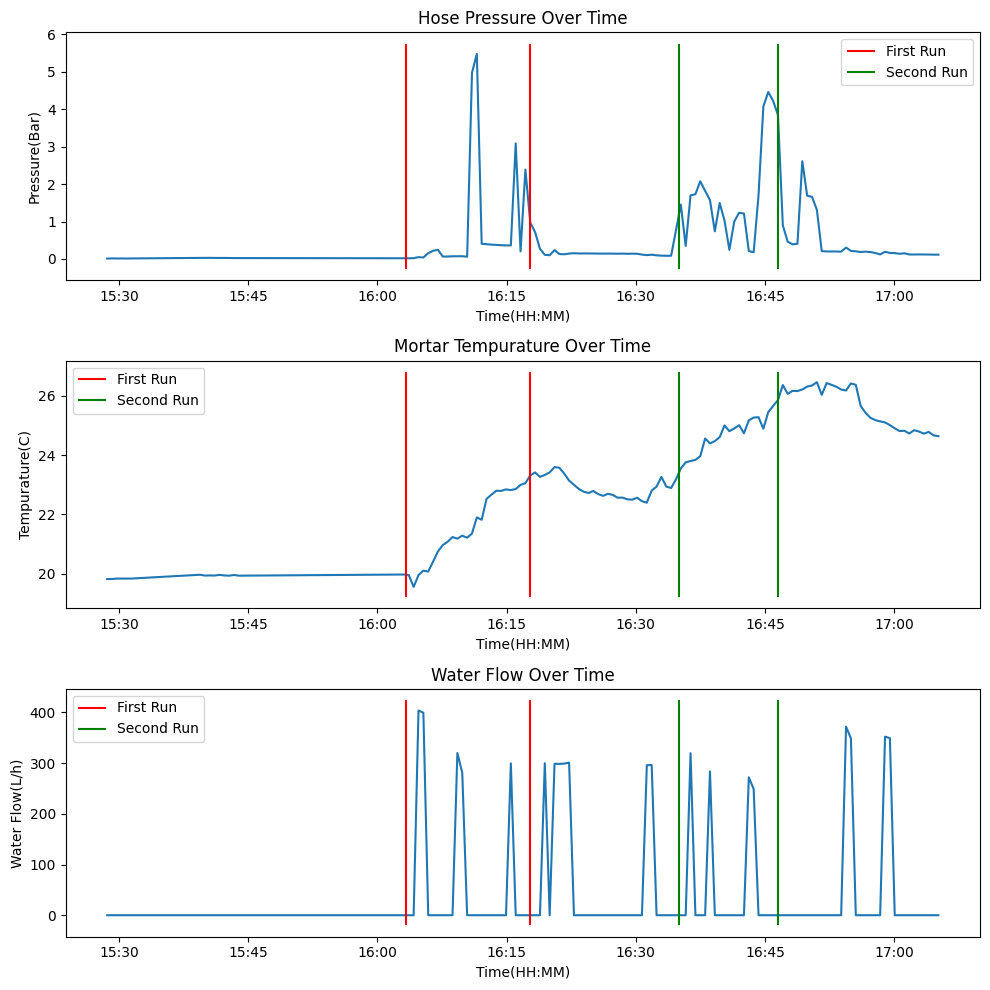

In [26]:
# Create a figure with two subplots (1 row, 2 columns)
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 10))
first_run = [19895.669, 19895.679]
second_run = [19895.691, 19895.699]

ax1.plot(df['timestamp'], df['GECO/MP_Pump_Pressure_Current_bar_R'])
myFmt = mdates.DateFormatter('%H:%M')
ax1.xaxis.set_major_formatter(myFmt)
ylim = ax1.get_ylim()
xlim = ax1.get_xlim()
ax1.vlines(first_run, ylim[0], ylim[1], colors='red', label='First Run')
ax1.vlines(second_run, ylim[0], ylim[1], colors='green', label='Second Run')
ax1.legend()
# Adding axis labels and title
ax1.set_xlabel('Time(HH:MM)')
ax1.set_ylabel('Pressure(Bar)')
ax1.set_title('Hose Pressure Over Time')

ax2.plot(df['timestamp'], df['GECO/MPTX_DI_Mortar_Temperature_C_R'])
ax2.xaxis.set_major_formatter(myFmt)
ylim = ax2.get_ylim()
xlim = ax2.get_xlim()
ax2.vlines(first_run, ylim[0], ylim[1], colors='red', label='First Run')
ax2.vlines(second_run, ylim[0], ylim[1], colors='green', label='Second Run')
ax2.legend()
# Adding axis labels and title
ax2.set_xlabel('Time(HH:MM)')
ax2.set_ylabel('Tempurature(C)')
ax2.set_title('Mortar Tempurature Over Time')
plt.tight_layout()

ax3.plot(df['timestamp'], df['GECO/MP_Waterflowrate_current_Lh_R'])
ax3.xaxis.set_major_formatter(myFmt)
ylim = ax3.get_ylim()
xlim = ax3.get_xlim()
ax3.vlines(first_run, ylim[0], ylim[1], colors='red', label='First Run')
ax3.vlines(second_run, ylim[0], ylim[1], colors='green', label='Second Run')
ax3.legend()
# Adding axis labels and title
ax3.set_xlabel('Time(HH:MM)')
ax3.set_ylabel('Water Flow(L/h)')
ax3.set_title('Water Flow Over Time')
plt.tight_layout()

In [ ]:
df.info()

In [13]:
df.describe()

,timestamp,GECO/MPRX_DI_DOS2_Flowrate_50Hz_mlmin_I,GECO/MPRX_DI_DOS3_Flowrate_50Hz_mlmin_I,GECO/MPRX_DI_FOG_Flowrate_50Hz_lmin_I,GECO/MPRX_DI_FOG_Foam_Air_Factor_I,GECO/MPRX_DI_FOG_Foam_Density_gl_I,GECO/MPRX_DI_FOG_Foam_Loss_Factor_pct_I,GECO/MPRX_DI_FOG_Foamingagent_pct_R,GECO/MPRX_DI_FOG_RESERVED_Foamingagent_cpct_I,GECO/MPRX_DI_MIX_Speed_Hz_I,...,GECO/MPXMB_Mixer_OutputCurrent_dA_I,GECO/MPXMB_Pump_OutputCurrent_dA_I,GECO/MPXMB_Pump_OutputPower_W_I,GECO/MPXMB_Waterpump_OutputFrequency_cHz_I,GECO/MPYMB_Waterpump_FrequencyRef_cHz_I,GECO/MP_DOS1_Flowrate_current_mlmin_I,GECO/MP_DOS2_Flowrate_current_mlmin_I,GECO/MP_DOS3_Flowrate_current_mlmin_I,GECO/MP_Pump_Pressure_Current_bar_R,GECO/MP_Waterflowrate_current_Lh_R
count,126,126.0,126.0,126.000000,126.0,126.000000,126.0,126.000000,126.0,126.0,...,126.0,126.000000,126.000000,126.000000,126.000000,126.0,126.0,126.0,126.000000,126.000000
mean,2024-06-21 16:27:18.811977472,0.0,0.0,91.746032,100.0,26.984127,0.0,1.619048,0.0,0.0,...,0.0,14.301587,276.587302,402.825397,2404.436508,0.0,0.0,0.0,0.608030,50.308083
min,2024-06-21 15:28:38.511643,0.0,0.0,0.000000,100.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,2047.000000,0.0,0.0,0.0,0.011469,0.000000
25%,2024-06-21 16:12:15.407623168,0.0,0.0,0.000000,100.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,2282.250000,0.0,0.0,0.0,0.105864,0.000000
50%,2024-06-21 16:29:52.311072,0.0,0.0,170.000000,100.0,50.000000,0.0,3.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,2355.000000,0.0,0.0,0.0,0.156210,0.000000
75%,2024-06-21 16:47:29.937012736,0.0,0.0,170.000000,100.0,50.000000,0.0,3.000000,0.0,0.0,...,0.0,38.000000,377.500000,0.000000,2421.000000,0.0,0.0,0.0,0.403295,0.000000
max,2024-06-21 17:05:08.457948,0.0,0.0,170.000000,100.0,50.000000,0.0,3.000000,0.0,0.0,...,0.0,79.000000,1740.000000,3162.000000,3369.000000,0.0,0.0,0.0,5.480470,403.791901
std,NaN,0.0,0.0,85.070130,0.0,25.020626,0.0,1.501238,0.0,0.0,...,0.0,19.010006,449.657937,937.658966,263.148673,0.0,0.0,0.0,1.065066,117.392172


In [190]:
df.to_csv("First_Run_Data_Log.csv")